### Sales Prediction for Big Mart Outlets
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. **The aim is to build a predictive model and predict the sales of each product at a particular outlet.**

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = [15, 10]

In [2]:
train = pd.read_csv("~/Downloads/train_v9rqX0R.csv")
test = pd.read_csv("~/Downloads/test_AbJTz2l.csv")

In [3]:
train.shape, test.shape

((8523, 12), (5681, 11))

In [5]:
train.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


### Steps

1. Univ & Bivariate Analysis
2. Missing Values
3. Outliers
4. Feature Engg.
5. Model Building...

#### First Model - Base Model

In [6]:
# Submission File
submission = pd.DataFrame({"Item_Identifier":test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":train.Item_Outlet_Sales.mean()})

In [7]:
# Export and Submit
submission.to_csv("Basemodel.csv", index = False) # 1773

In [8]:
cd

C:\Users\IT


### Univariate Analysis

In [9]:
# Concatenate the Data

combined = pd.concat([train, test], ignore_index= True)

In [10]:
combined.shape

(14204, 12)

In [11]:
# List of Num Cols
combined.select_dtypes(include = np.number).columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

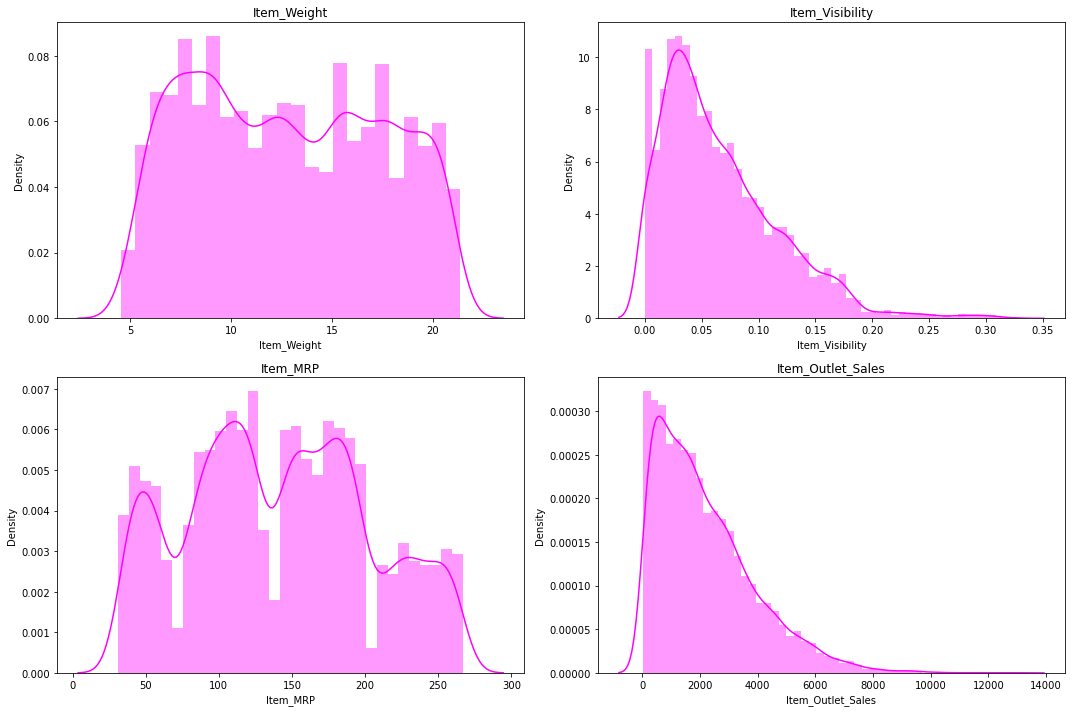

In [12]:
num_cols = ['Item_Weight', 'Item_Visibility', 
            'Item_MRP','Item_Outlet_Sales']

nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i], color = "magenta")
    plt.title(i)
    iterator+=1

plt.tight_layout()
plt.show()

# Item Weight has no pattern of Skewness. Appears Uniform
# Item Visibility is +vely skewed.
# Item MRP has 4 Modes...
# Sales is Skewed.

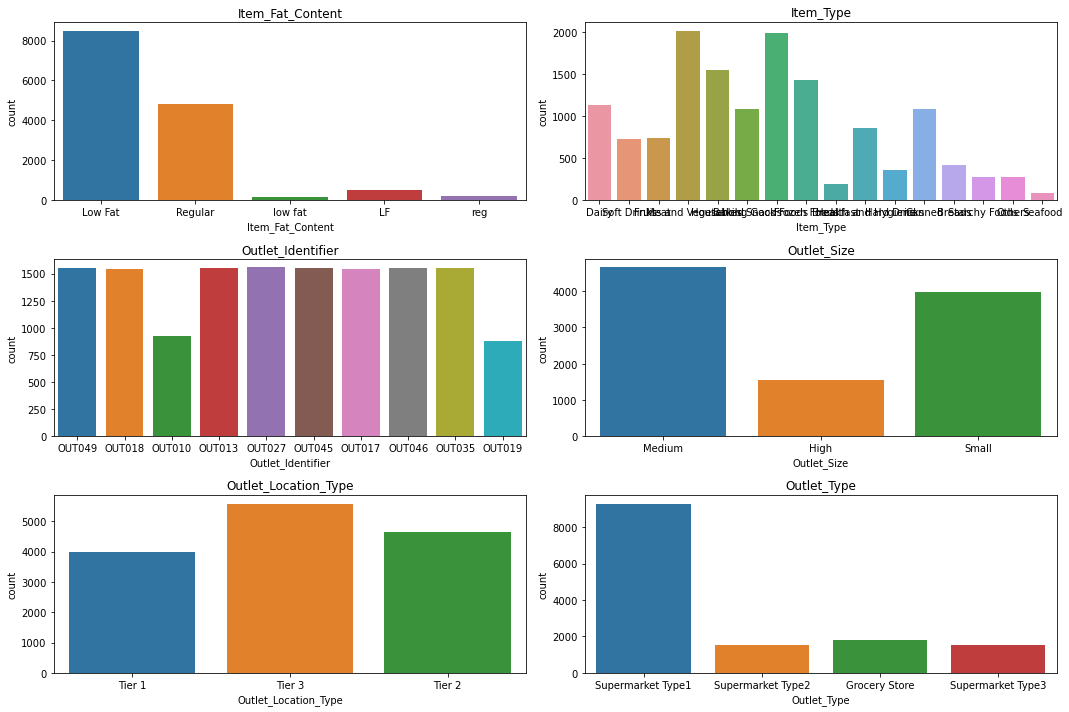

In [16]:
# Cat Variables

combined.select_dtypes(include = "object").columns

cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.countplot(combined.loc[:, i])
    plt.title(i)
    iterator+=1
    
plt.tight_layout()
plt.show()

# Most of the Outlets are Medium Size Outlets
# The Item Types are only 2 in the data: Low Fat & Regular.
# Most of the Outlets are estd in Tier 3 cities.
# And the Outlets are mostly S1 type outlets.

<AxesSubplot:>

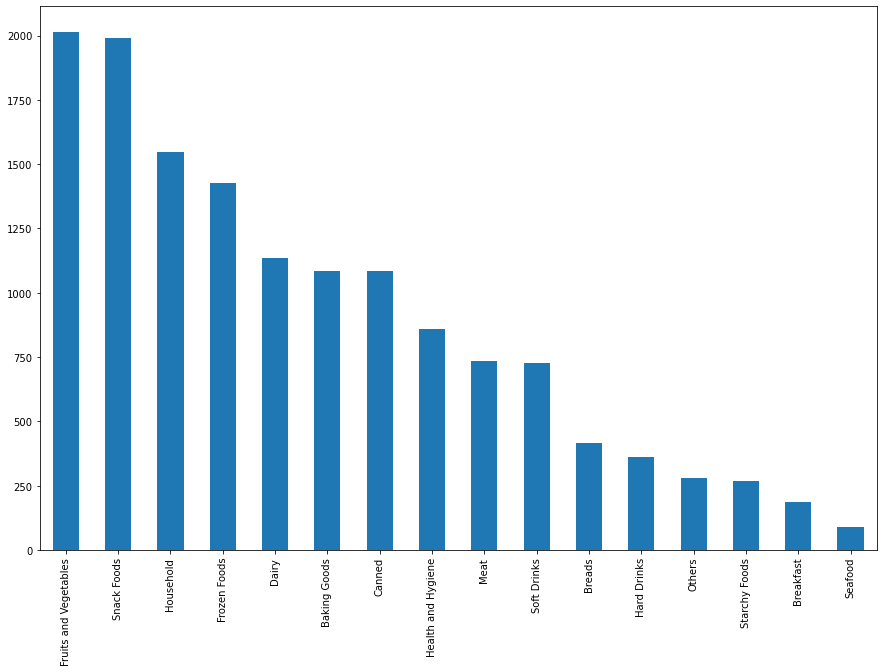

In [18]:
# Item Type
combined.Item_Type.value_counts().plot(kind ="bar")
# Top 5 Selling Items: Fruits & Veggies, Dairy, Snacks, Household & Frozen

In [19]:
# Outlet

combined.Outlet_Identifier.value_counts()

# Out027 is the highly visible outlet in the business

OUT027    1559
OUT013    1553
OUT049    1550
OUT046    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

### Summary

* Most Spread Out Outlet in the business is "OUT027"
* Most of the Outlets are in Tier 3 Cities.
* The Top 5 Selling Items are Fruits & Veggies, Dairy, Snacks, Frozen and Household.
* Generally the Outlets are of S1 Type in Nature.

<AxesSubplot:xlabel='Outlet_Identifier', ylabel='Item_Outlet_Sales'>

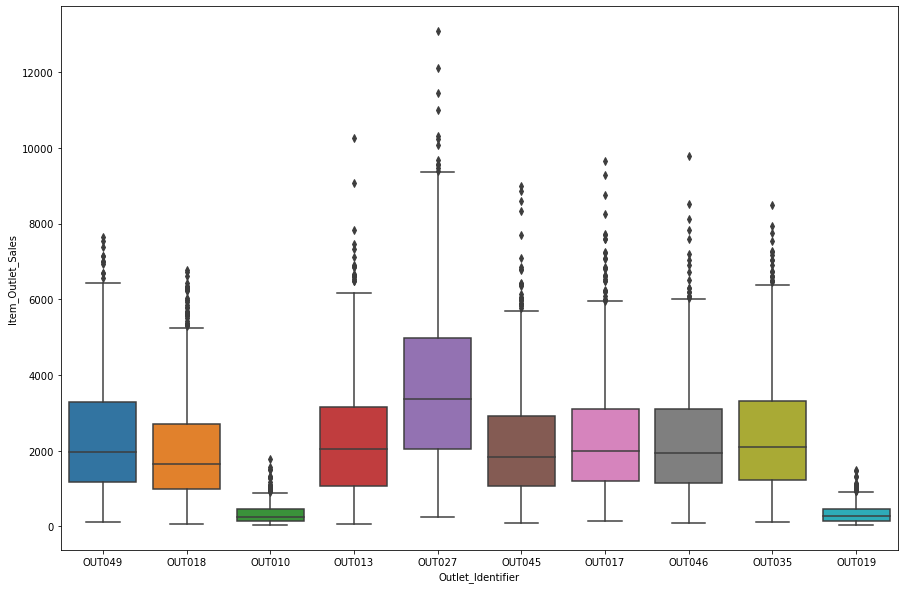

In [20]:
# Outlet ID vs Sales

sns.boxplot(combined.Outlet_Identifier, 
            combined.Item_Outlet_Sales)

In [21]:
# Fix the Item Fat Content
combined.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [22]:
# Replace
combined.Item_Fat_Content.replace(to_replace = ['low fat', 'LF', 'reg'],
                                 value = ["Low Fat", "Low Fat", "Regular"],
                                 inplace = True)

### Bivariate Analysis
*  Num vs Num (tgt var)
* Cat vs Num (tgt var)

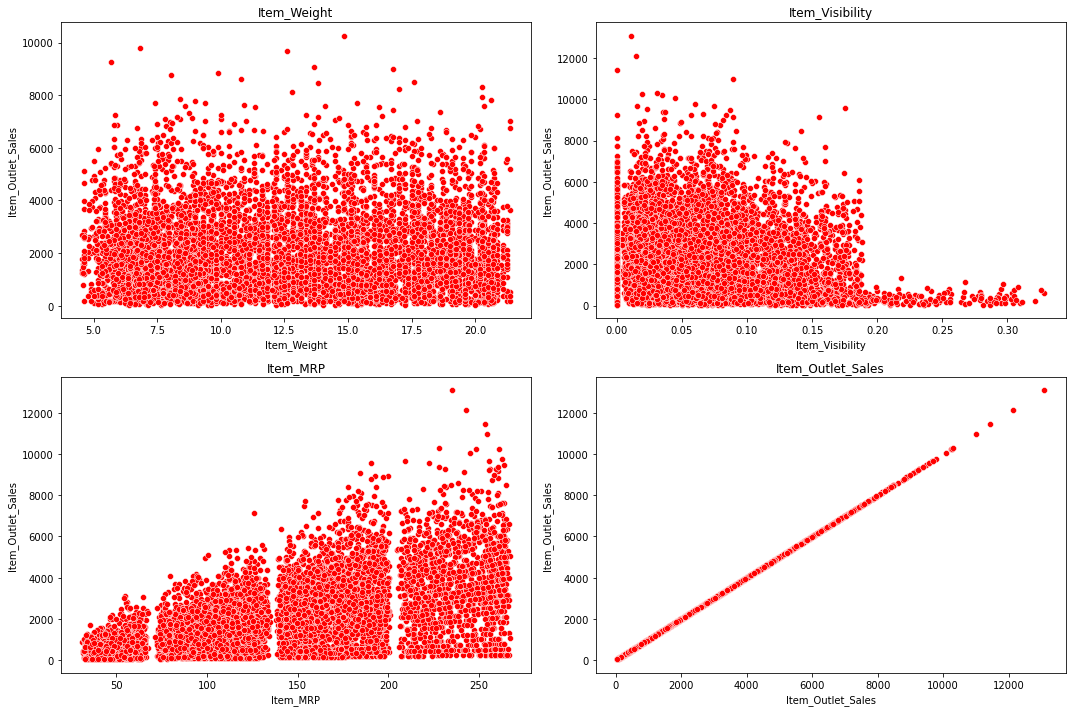

In [25]:
# Scatterplot
nrows = 2
ncols = 2
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.scatterplot(combined.loc[:, i], combined.Item_Outlet_Sales, 
                    color = "red")
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

# Item Visibility has lot of 0s that need fixing.
# Item Visibility has a -ve effect as the Visibility Increases, the sales go down.
# Item Weight has no relation with Sales since it is uniform in nature.
# Item MRP since, it was multimodal data, 
# we can see that there are 4 clusters of Sales emerging.
# We also understand that due to combination effect, the clusters are developed.

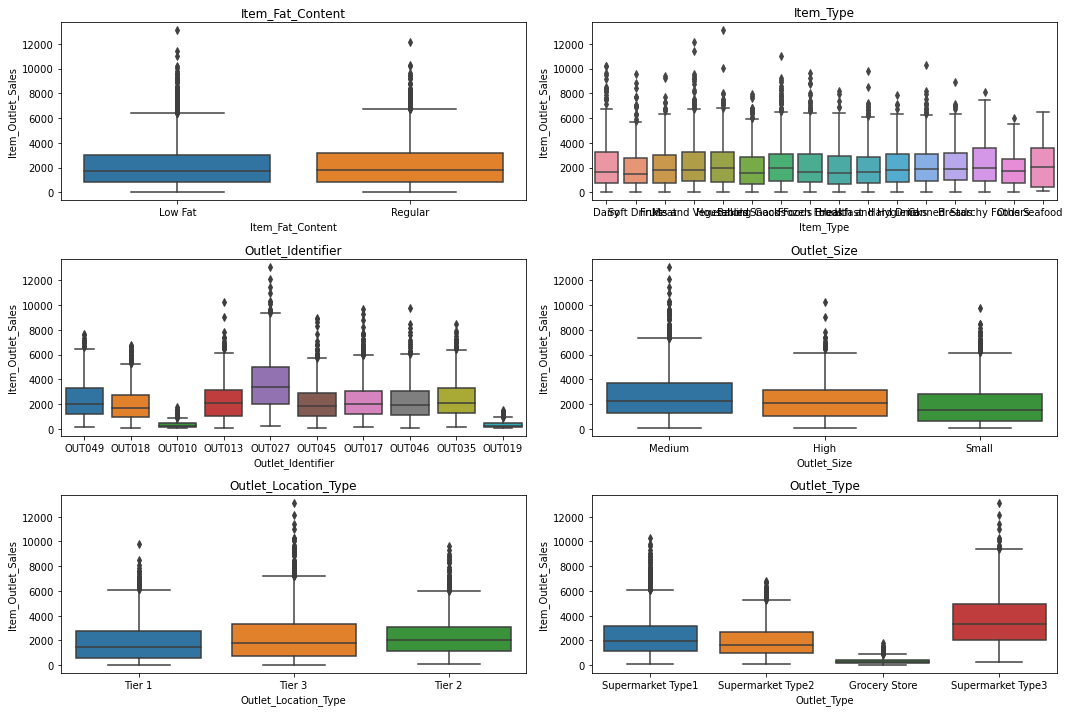

In [28]:
# Cat vs Number
nrows = 3
ncols = 2
iterator = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.boxplot(combined.loc[:, i], combined.Item_Outlet_Sales)
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show
# Low Fat Content have the Highest Sales
# Tier3 Cities followed by S3 have the Highest Sales.
# Most Revenue Generating Outlets are OUT027 & OUT013.
# The worst performing outlets are OUT013 & OUT010 followed by Grocery Store...

### Missing Values

In [29]:
combined.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [39]:
# Item Weight
combined.loc[combined.Item_Weight.isnull()].tail(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14192,FDN31,NaN,Low Fat,0.072529,Fruits and Vegetables,188.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [38]:
#combined.loc[combined.Item_Type=="Hard Drinks", "Item_Weight"]

combined.loc[combined.Item_Identifier=="FDN31", "Item_Weight"]

1610     11.5
1866     11.5
2494     11.5
3741     11.5
8863     11.5
9636     11.5
10616    11.5
14013    11.5
14192     NaN
Name: Item_Weight, dtype: float64

In [55]:
combined["Item_Weight"] =combined.groupby("Item_Identifier")["Item_Weight"].apply(lambda x: x.fillna(x.mean()))

#mapping = combined.groupby("Item_Identifier")["Item_Weight"].mean().to_dict()
#combined["Item_Weight"] = combined.Item_Identifier.map(mapping)


In [57]:
combined["Item_Visibility"] =combined.groupby("Item_Identifier")["Item_Visibility"].apply(lambda x: x.replace(to_replace = 0, 
                                                                                                             value = x.mean()))

In [58]:
# Outlet Size
combined.loc[combined.Outlet_Size.isnull()].head(2)

# Note: Outlet Size will depend largely on Outlet Type.

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986


In [74]:
# Frequency Table
pd.DataFrame(combined.groupby(["Outlet_Identifier", "Outlet_Type"])["Outlet_Size"].value_counts())
# Grocery Store ~ Small
# S2 and S3 ~ Medium
# S1 ~ Small

,,,Outlet_Size
Outlet_Identifier,Outlet_Type,Outlet_Size,
OUT010,Grocery Store,Small,925
OUT013,Supermarket Type1,High,1553
OUT017,Supermarket Type1,Small,1543
OUT018,Supermarket Type2,Medium,1546
OUT019,Grocery Store,Small,880
OUT027,Supermarket Type3,Medium,1559
OUT035,Supermarket Type1,Small,1550
OUT045,Supermarket Type1,Small,1548
OUT046,Supermarket Type1,Small,1550


In [75]:
# Code for Missing Values in Outlets

combined.loc[(combined.Outlet_Type=="Grocery Store") & 
             (combined.Outlet_Size.isnull()), "Outlet_Size"] ="Small"

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [73]:
combined.loc[(combined.Outlet_Type=="Supermarket Type1") & 
             (combined.Outlet_Size.isnull()), "Outlet_Size"] = "Small"

### Outliers....

<AxesSubplot:>

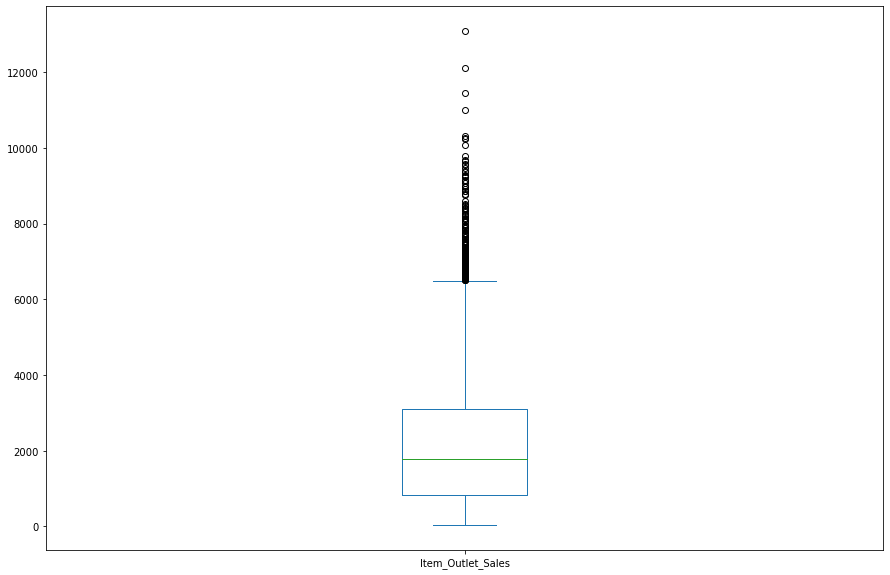

In [78]:
# target

combined.Item_Outlet_Sales.plot(kind = "box")

#q1 = combined.quantile(0.25)
#q3 = combined.quantile(0.75)

#iqr = q3 - q1

#upper_lim = q3+1.5*iqr
#lower_lim = q1-1.5*iqr

#newdata = combined.loc[~((combined<lower_lim) | ()).any(axis = 1)]

### Feature Engineering

In [79]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [82]:
ids = []

for i in combined.Item_Identifier:
    ids.append(i[:2])

In [84]:
combined["Item_Ids"] = pd.Series(ids) 

In [87]:
#sns.boxplot(combined.Item_Ids, combined.Item_Outlet_Sales)

# Perishable and Non Perishables

combined.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [88]:
perishables = ['Dairy','Meat', 'Fruits and Vegetables','Breakfast',"Breads",
              'Starchy Foods',"Seafood"]

def perish(x):
    if x in perishables:
        return("Perishables")
    else:
        return("Non_Perishables")

In [90]:
combined["Item_Type_Cat"] = combined.Item_Type.apply(perish)

In [95]:
# Item ID vs Item Fat Content
pd.crosstab(combined.Item_Ids, combined.Item_Fat_Content)

Item_Fat_Content,Low Fat,Non_Edible,Regular
Item_Ids,,,
DR,1208,0,109
FD,5291,0,4910
NC,0,2686,0


In [94]:
# Apply Non Edible in Item Fat Content for NC...
combined.loc[combined.Item_Ids=="NC", "Item_Fat_Content"]="Non_Edible"

In [96]:
# Vintage of the Outlets...
combined["Vintage"] = 2013 - combined.Outlet_Establishment_Year

In [98]:
# Price Per Unit = MRP/Weight
combined["Price_Per_Unit"] = combined.Item_MRP/combined.Item_Weight

<AxesSubplot:xlabel='Price_Per_Unit', ylabel='Item_Outlet_Sales'>

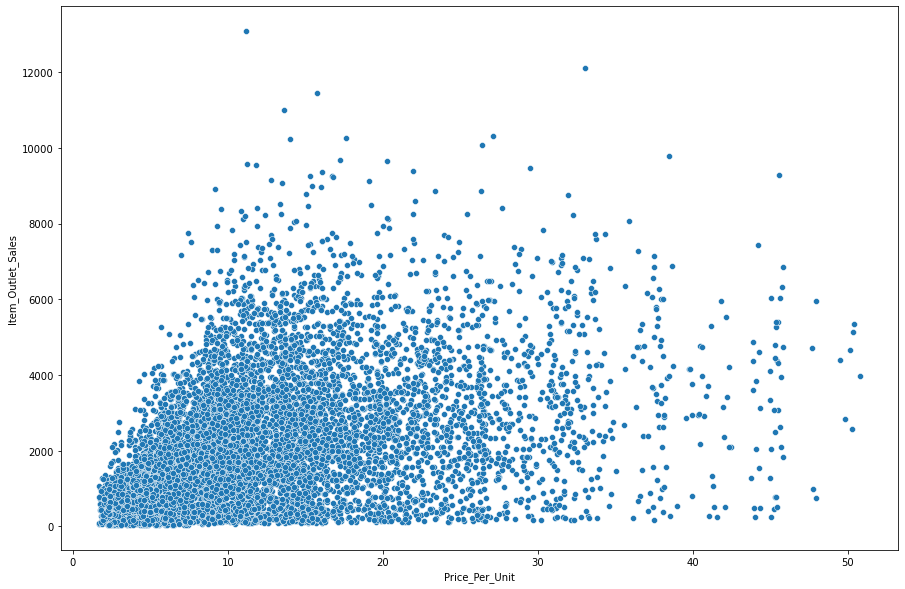

In [99]:
# Check with tgt
sns.scatterplot(combined.Price_Per_Unit, combined.Item_Outlet_Sales)

In [103]:
# Sales Summary basis Outlets
outlet_sales = combined.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean().to_dict()

In [105]:
combined["Outlet_Identifier"] = combined.Outlet_Identifier.map(outlet_sales)

In [106]:
combined.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Ids,Item_Type_Cat,Vintage,Price_Per_Unit
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,2348.354635,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,14,26.861204
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,1995.498739,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non_Perishables,4,8.153581
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,2348.354635,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,14,8.092457
3,FDX07,19.20,Regular,0.017834,Fruits and Vegetables,182.0950,339.351662,1998,Small,Tier 3,Grocery Store,732.3800,FD,Perishables,15,9.484115
4,NCD19,8.93,Non_Edible,0.009780,Household,53.8614,2298.995256,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non_Perishables,26,6.031512


In [107]:
# Drop the columns
newdata = combined.drop(["Item_Identifier", "Outlet_Establishment_Year",
                        "Item_Type"], axis = 1)

In [116]:
# Split the Data in Train and Test

train.shape, test.shape

newtrain = newdata.loc[0:train.shape[0]-1, :]
newtest = newdata.loc[train.shape[0]:, :]
newtest.drop("Item_Outlet_Sales", axis =1, inplace = True)
print(newtrain.shape, newtest.shape)

(8523, 13) (5681, 13)


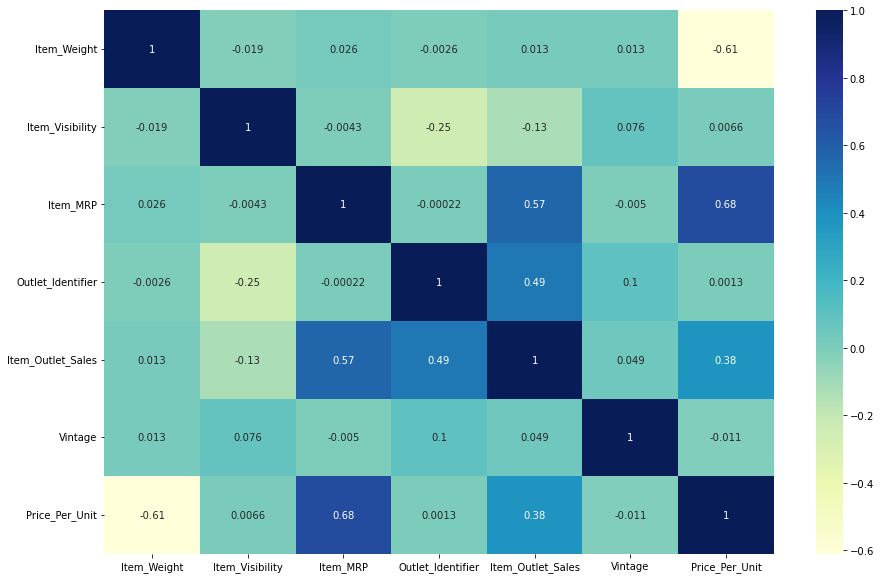

In [121]:
sns.heatmap(newtrain.loc[:, cols].corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [118]:
# Apply Statistics on the Data
cols = newtrain.select_dtypes(include = np.number).columns

import scipy.stats as stats
for i in cols:
    teststats, pvalue = stats.ttest_ind(newtrain.loc[:, i], 
                                        newtrain.Item_Outlet_Sales)
    print(i, ": ", pvalue)

Item_Weight :  0.0
Item_Visibility :  0.0
Item_MRP :  0.0
Outlet_Identifier :  0.9999999999999823
Item_Outlet_Sales :  1.0
Vintage :  0.0
Price_Per_Unit :  0.0


In [123]:
newtrain.shape, newtest.shape

((8523, 13), (5681, 12))

## Model Building

In [125]:
# Remove the Outliers

q1 = newtrain.quantile(0.25)
q3 = newtrain.quantile(0.75)
iqr = q3 - q1

upper_limit = q3+1.5*iqr
lower_limit = q1-1.5*iqr

wt_outliers = newtrain.loc[~((newtrain<lower_limit) | 
                             (newtrain>upper_limit)).any(axis = 1)]

In [126]:
wt_outliers.shape

(6169, 13)

In [129]:
# Encoding
newtrain.Outlet_Size.value_counts()

mapped = {"Small":3, "Medium":2, "High":1}

newtrain["Outlet_Size"] = newtrain.Outlet_Size.map(mapped)
#wt_outliers["Outlet_Size"] = wt_outliers.Outlet_Size.map(mapped)

In [143]:
wt_outliers.shape, newtrain.shape

((6169, 13), (8523, 13))

In [130]:
train_encoded = pd.get_dummies(newtrain, drop_first = True)
#wt_encoded = pd.get_dummies(wt_outliers, drop_first = True)
print(train_encoded.shape, wt_encoded.shape)

(8523, 18) (6169, 16)


In [ ]:
# newtest encoding
newtest['Outlet_Size'] = newtest.Outlet_Size.map(mapped)
newtest_encoded = pd.get_dummies(newtest, drop_first = True)

In [147]:
# Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state=0)
lr = LinearRegression()

pred = []
X = train_encoded.drop("Item_Outlet_Sales", axis = 1)
y = train_encoded.Item_Outlet_Sales

for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(lr.fit(xtrain, ytrain).predict(newtest_encoded))
    
# Prediction File
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [148]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("LRModel.csv", index = False) # 1193

In [150]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf = RandomForestRegressor()

kfold = KFold(n_splits = 5, shuffle = True, random_state=0)
pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(rf.fit(xtrain, ytrain).predict(newtest_encoded))
    
# Prediction File
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [151]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("RFModel.csv", index = False) # 1189.1578541450301

In [152]:
gbm = GradientBoostingRegressor()

kfold = KFold(n_splits = 5, shuffle = True, random_state=0)
pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(gbm.fit(xtrain, ytrain).predict(newtest_encoded))
    
# Prediction File
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [153]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("GBRodel.csv", index = False) # 1153.9315124235288.

In [154]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

kfold = KFold(n_splits = 5, shuffle = True, random_state=0)
pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(xgb.fit(xtrain, ytrain).predict(newtest_encoded))
    
# Prediction File
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [155]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("XGBodel.csv", index = False) # 1178.3383516159906

In [156]:
# Grid Search on Gradient Boosting Model

from sklearn.model_selection import GridSearchCV

params = [{"loss":['squared_error', 'absolute_error', 'huber', 'quantile'],
          'n_estimators':[100, 200, 500, 1000], 
          'criterion':['friedman_mse', 'squared_error', 'mse'],
          'min_samples_split':[2, 4, 6, 8]}]

grid = GridSearchCV(estimator = gbm, param_grid = params, cv = 3)

grid.fit(X, y)

grid.best_params_

{'criterion': 'friedman_mse',
 'loss': 'absolute_error',
 'min_samples_split': 4,
 'n_estimators': 100}

In [160]:
gbm = GradientBoostingRegressor(criterion='friedman_mse', loss='squared_error',
                                min_samples_split= 4,n_estimators=100)

kfold = KFold(n_splits = 5, shuffle = True, random_state=0)
pred = []
for train_index, test_index in kfold.split(X, y):
    xtrain = X.loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(gbm.fit(xtrain, ytrain).predict(newtest_encoded))
    
# Prediction File
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [161]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred}
submission.to_csv("GBM_TunedModel.csv", index = False) # 1154

In [162]:
# Stacking Regressor

from sklearn.ensemble import StackingRegressor

finalmodel = GradientBoostingRegressor(criterion='friedman_mse', loss='squared_error',
                                min_samples_split= 4,n_estimators=100)

basemodels = [('lr', lr), ('rf', rf), ('xgb', xgb)]

stack = StackingRegressor(estimators = basemodels, 
                          final_estimator = finalmodel, cv = 5)

kfold = KFold(n_splits = 10, shuffle = True, random_state=0)
pred = []
for train_index, test_index in kfold.split(X.drop("Outlet_Identifier", axis=1), y):
    xtrain = X.drop("Outlet_Identifier", axis=1).loc[train_index]
    ytrain = y.loc[train_index]
    pred.append(stack.fit(xtrain, ytrain).predict(newtest_encoded.drop("Outlet_Identifier", axis=1)))
    
# Prediction File
finalpred = np.abs(pd.DataFrame(pred).T.mean(axis = 1))

In [163]:
submission = pd.DataFrame({"Item_Identifier": test.Item_Identifier,
                          "Outlet_Identifier":test.Outlet_Identifier,
                          "Item_Outlet_Sales":finalpred})

submission.to_csv("StackingModel.csv", index = False) # 1157

In [ ]:
# Sample Cross Validation Code...
for train_index, test_index in kf.split(x, y):
    xtrain = x.loc[train_index]
    ytrain = y.loc[train_index]
    ytest = y.loc[test_index]
    xtest = x.loc[test_index]
    pred =lr.fit(xtrain, ytrain).predict(xtest)
    r2_score(ytest, pred)
    np.sqrt(mean_squared_error(ytest, pred))